# <font color="blue"> Weiyi Chen

# MTH9879 Homework 4

Assigned: February 24, 2015.
Due: March 10, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 0. (0 points) 
Read Chapter 5 and 6 of Hasbrouck and Chapters 2 and 3 of Foucault, Pagano and R&ouml;ell. 


## Glosten and Milgrom

### 1. (8 points) 

(Adapted from Hasbrouck 5.2 but please note that the setup in (3) in the slides is different from Hasbrouck's in Figure 5.1 of his book.) Consider a variant of the Glosten and Milgrom model where there is informed trading only in the low state $V=\underline V$.

(a) Show that the learned probability after one step that the true price is $\bar V$ is given by

$$
\delta_1(Buy)=\Pr(\bar V|Buy)=\frac{\delta}{1-\mu\,(1-\delta)};\quad \delta_1(Sell)=\Pr(\bar V|Sell)=\frac{\delta}{1+\mu\,(1-\delta)}
$$

and that

$$
A=\frac{\underline V\,{(1-\delta)\,(1-\mu)}+\bar V\,{\delta}}{{1-\mu\,(1-\delta)}};\quad B=\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}
$$

(b) Deduce an expression for the spread $s=A-B$.

(c) Explain the sensitivities of the spread to the parameters of the model to a non-expert.


## <font color="blue"> Solution 

<font color="blue">
#### (a) 

The learned probability after one step that the true price is $\bar V$ is given by

\begin{equation}
\delta_1(\text{Buy})=\Pr(\bar V|\text{Buy})
=\frac{\Pr(\bar V \cap \text{Buy})}{\Pr(\text{Buy})}
=\frac{\frac 12 \delta}{\frac 12[1-\mu(1-\delta)]}
=\frac{\delta}{1-\mu\,(1-\delta)}
\end{equation}

\begin{equation}
\delta_1(\text{Sell})=\Pr(\bar V|\text{Sell})
=\frac{\Pr(\bar V \cap \text{Sell})}{\Pr(\text{Sell})}
=\frac{\frac 12 \delta}{\frac 12 [1+\mu(1-\delta)]} 
=\frac{\delta}{1+\mu\,(1-\delta)}
\end{equation}

and that

\begin{equation}
A=\E(V|\text{Buy})
=\bar V \Pr(\bar V|\text{Buy})+\underline V \Pr(\underline V|\text{Buy})
=\frac{\underline V\,{(1-\delta)\,(1-\mu)}+\bar V\,{\delta}}{{1-\mu\,(1-\delta)}}
\end{equation}

\begin{equation}
B=\E(V|\text{Sell})
={\bar V\,\Pr(\bar V|\text{Sell})+\underline V\,\Pr(\underline V|\text{Sell})}
=\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}
\end{equation}

#### (b) 
The Spread:
\begin{equation}
s=A-B
=\frac{2(\bar V - \underline V)\mu\delta(1-\delta)}{1-\mu^2(1-\delta)^2}
\end{equation}

#### (c) 

##### paramter $\bar V - \underline V$
As the spread between the asset prices increases, the spread increases which implies a source of risk should be compensated by a larger bid-ask spread.  
##### paramter $\mu$
As $\mu$ increases, the spread increases which implies an increase of the impact in adverse selection should be compensated by a larger bid-ask spread.  
##### paramter $\delta$
As $\delta$ decreases, the spread increases, which implies adverse selection occurs in the case of a sell order.

### Set up R environment for the next questions

In [1]:
%load_ext rmagic

In [2]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip'
Content type 'application/zip' length 695952 bytes (679 Kb)
opened URL
downloaded 679 Kb



In [3]:
%%R
load("tq.rData")
# install.packages("highfrequency")
# install.packages("quantmod")
library(highfrequency)
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘quantmod’

The following objects are masked from ‘package:highfrequency’:

    getPrice, has.Qty



## The Lee and Ready tick test

### 2. (10 points) 

In the following use the trades and quotes object *tqBAC* in the loaded data *tq.rData*.  Denote trade prices by $p_t$ and mid-quotes by $m_t$.

(a) Compute the time series of trade signs $\epsilon_t$ according to $\epsilon_t=+1$ if $p_t>m_t$ and  $\epsilon_t=-1$ otherwise, using the Lee-Ready rule for trades at mid.  Name this series *tradeSigns*. (Note this was already done in the lecture.)

(b) Compute the Lee-Ready trade-sign indicator time series (as if you didn't have quotes and so no mid-prices).

(c) Compute the correlation of these two indicators.

(d) Assume the rule in part (a) is 100% accurate.  What percentage of trades are correctly signed by the Lee-Ready test?

(e) Explain the relationship between your answers in (c) and (d).


## <font color='blue'> Solution:

In [8]:
%%R

# (a) Compute the time series of trade signs

tradeSigns = getTradeDirection(tqBAC) 

# (b) Compute the Lee-Ready trade-sign indicator time series

ts_price = as.numeric(tqBAC$PRICE)
len_price = length(ts_price)
ts_indicator = rep(0,length(ts_price)-1)
ts_indicator[1] = 1

for(i in 2:len_price){
    if (ts_price[i] > ts_price[i-1])
        ts_indicator[i-1] = 1
    else if (ts_price[i] < ts_price[i-1])
        ts_indicator[i-1] = -1
    else
        ts_indicator[i-1] = ts_indicator[i-2]   
}
            
# (c) Compute the correlation of these two indicators
            
correlation = cor(ts_indicator, tradeSigns[-1])
cat("(c) The correlation of these two indicators:", correlation, "\n")
            
# (d) What percentage of trades are correctly signed by the Lee-Ready test?
            
num_count = 0
for (i in 1:(len_price-1))
    if (ts_indicator[i]==tradeSigns[i+1]) 
        num_count = num_count+1
cat("(d) The percentage of trades correctly signed by the Lee-Ready test:", num_count/(len_price-1)*100, '%\n')

# (e) The relationship between your answers in (c) and (d).
        
cat("(e) The larger the correlation, the larger the percentage number.")

(c) The correlation of these two indicators: 0.6618357 
(d) The percentage of trades correctly signed by the Lee-Ready test: 82.97026 %
(e) The larger the correlation, the larger the percentage number.

## Realized spread by exchange

### 3. (8 points)

(a) Reproduce Figure 6 from the lecture slides, making sure to get the aesthetics right.

(b) Explain why the realized spread profile varies by exchange.

(c) Redo the picture adjusting for the following (assumed) take fees:

** Exchange ** | ** Take fee ** 
--- | --- 
| (**cents**)
D | 0.10 
B | -0.04
Z | 0.29
Y | 0.00
P | 0.25

(d) Based on your results, where would you advise sending a small market order?  How about a large one?


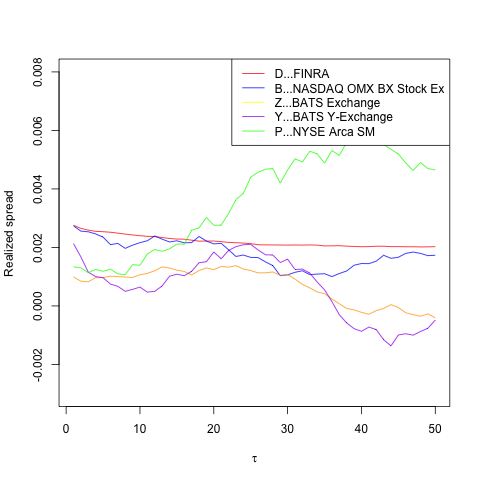

In [32]:
%%R

# create a function to generate rsLags

rsLag <- function(ex) {
    set <- subset(tqBAC, tqBAC$EX==ex)
    ts_mids <- (as.numeric(set$OFR) + as.numeric(set$BID))/2
    ts_price <- as.numeric(set$PRICE)
    len_price <- length(ts_price)
    tradeSigns <- getTradeDirection(set)
    rs <- function(lag){mean(tradeSigns[1:(len_price-lag)]*(ts_price[1:(len_price-lag)]-ts_mids[-(1:lag)]))}
    rsLag <- sapply(1:50,rs)
    return (rsLag)
}

# create rsLags for differen

rsLagD <- rsLag('D')
rsLagB <- rsLag('B')
rsLagZ <- rsLag('Z')
rsLagY <- rsLag('Y')
rsLagP <- rsLag('P')

# Reproduce Figure 6 from the lecture slides

plot(x=1:50,y=rsLagD,col="red",type="l",xlab=expression(tau), ylab = "Realized spread", ylim=c(-0.003, 0.008))
lines(x=1:50,y=rsLagB,col="blue")
lines(x=1:50,y=rsLagZ,col="orange")
lines(x=1:50,y=rsLagY,col="purple")
lines(x=1:50,y=rsLagP,col="green")
legend("topright", 
       c("D...FINRA","B...NASDAQ OMX BX Stock Ex","Z...BATS Exchange","Y...BATS Y-Exchange","P...NYSE Arca SM"),
       lty = c(1,1,1,1,1), 
       col=c("red","blue","yellow","purple","green"))


<font color='blue'>
(b) As different exchanges have their own fee structures, and a market taker would choose his execution venue based on transaction costs, therefore the fee structure will decide where a market taker executes at.

<font color='blue'>
(c) Below the R codes to new fees:

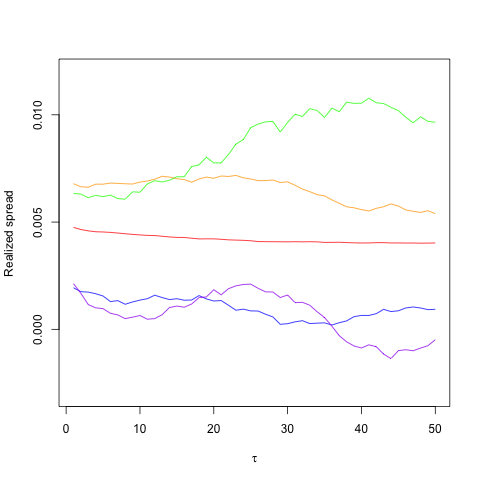

In [33]:
%%R
plot(x=1:50,y=rsLagD+0.001*2,col="red",type="l",xlab=expression(tau), ylab = "Realized spread", ylim=c(-0.003, 0.012))
lines(x=1:50,y=rsLagB-0.0004*2,col="blue")
lines(x=1:50,y=rsLagZ+0.0029*2,col="orange")
lines(x=1:50,y=rsLagY,col="purple")
lines(x=1:50,y=rsLagP+0.0025*2,col="green")

<font color='blue'>

(d) 

For a small one, take care about the fees, while for a larger one, take care about liquidity, because liquidity will be larger for a market order, and the cost for the order is comparably small. In conclude, it's a tradeoff between liquidity and fees.

## Predicting trade signs

### 4. (6 points) 

The following require the *tradeSigns* series from Problem 2.

(a) Denote the probability of a sign reversal by $\pi$.  Derive an expression in terms of $\pi$ for the conditional expectation $\E[\epsilon_t|\epsilon_{t-1}]$.

(b) Assume zero expectation of the trading signs, fit an AR(1) model to the series *tradeSigns*.  What is the coefficient returned by this model?  Explain how  this coefficient relates to $\pi$?


## <font color='blue'> Solution:

#### <font color='blue'>(a)

<font color='blue'>
The expression in terms of $\pi$ for the conditional expectation $\E[\epsilon_t|\epsilon_{t-1}]$:

\begin{equation}
    \E[\epsilon_{t}|\epsilon_{t-1}] = \epsilon_{t-1}(1-2\pi)
\end{equation}

#### <font color='blue'> (b) 

<font color='blue'>
Fit an AR(1) model to the series *tradeSigns*:

In [10]:
%%R

# same process of problem 2

tradeSigns <- getTradeDirection(tqBAC) 

# create epsilon_t and epsilon_{t-1}

epsilon_t = tradeSigns[1:(length(tradeSigns)-1)]
epsilon_t_1 = tradeSigns[2:length(tradeSigns)]

# calculate coefficient

df_tradeSigns = data.frame(epsilon_t, epsilon_t_1)
df_tradeSigns.lm = lm(epsilon_t ~ epsilon_t_1, data=df_tradeSigns)
cat("(b) The coefficient returned by this model:", coefficients(df_tradeSigns.lm)[2])

(b) The coefficient returned by this model: 0.08153492

<font color='blue'>
The coefficient is close to 0, which implies the two *tradeSigns* are almost independent. 

In addition, given $\epsilon_t=\rho\epsilon_{t-1}+\eta_t$ we have 

\begin{equation}
\E[\epsilon_t|\epsilon_{t-1}]=\rho\epsilon_{t-1}
\end{equation}

Therefore we could conclude that

\begin{equation}
\rho\approx (1-2\pi)
\end{equation}

## The MRR model

### 5. (6 points)
Using the estimate of $\rho$ (the coefficient obtained from fitting to an AR(1) model) from Problem 4 and equation (11) from the lecture slides:

$$
\Delta p_t=(\phi+\lambda)\,\epsilon_t-(\phi+\rho\,\lambda)\,\epsilon_{t-1}+e_t+\Delta \xi_t
$$

estimate by linear regression the MRR parameters $\phi$ (transaction cost) and $\lambda$ (adverse selection or "Kyle lambda") from  *tqBAC*.  This amounts to ignoring the autocorrelation of the $\Delta \xi_t$.
<br>

Hint: Use the R function *lm*  to perform the linear regressions.

## <font color='blue'> Solution:

<font color='blue'>
Below are the R code to perform linear regression:

In [13]:
%%R
ts_change = ts_price[2:len_price]-ts_price[1:(len_price-1)]
df_tradeSigns = data.frame(epsilon_t, epsilon_t_1, ts_change)
df_tradeSigns.lm = lm(ts_change ~ epsilon_t+epsilon_t_1, data=df_tradeSigns)
cat("The coefficients of the model:", coefficients(df_tradeSigns.lm)[2], coefficients(df_tradeSigns.lm)[3])

The coefficients of the model: -0.002336749 0.002876938

<font color='blue'>
Given

\begin{equation}
\phi+\lambda=-0.002336749, -(\phi+\rho\lambda)=0.002876938
\end{equation}

We are able to derive

\begin{equation}
\phi=-0.00292489, \lambda=0.00058814
\end{equation}